<a href="https://colab.research.google.com/github/simon-frank/systemsBiologyI/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers[torch] datasets evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

Using rotten tomato for sentiment analyze

training rotten tomatoe with pretrained BERT

In [2]:
from datasets import load_dataset
rotten_tomatoes = load_dataset("rotten_tomatoes")

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Dataset rotten_tomatoes downloaded and prepared to /root/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

baise blabla

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2))
train_features = vectorizer.fit_transform(rotten_tomatoes['train']['text'])
test_features = vectorizer.transform(rotten_tomatoes['test']['text'])
print(len(vectorizer.get_feature_names_out()))
print(vectorizer.get_feature_names_out()[200:210])

104801
['1983 koyaanisqatsi' '1984' '1984 and' '1984 uncut' '1986' '1986 harlem'
 '1988' '1988 powaqqatsi' '1989' '1989 paradiso']


In [ ]:
train_features

<8530x16474 sparse matrix of type '<class 'numpy.int64'>'
	with 143428 stored elements in Compressed Sparse Row format>

In [ ]:
classifier = MultinomialNB()
classifier.fit(train_features, rotten_tomatoes['train']['label'])

MultinomialNB()

In [ ]:
predictions = classifier.predict(test_features)
accuracy = accuracy_score(rotten_tomatoes['test']['label'], predictions)
precision = precision_score(rotten_tomatoes['test']['label'], predictions)
recall = recall_score(rotten_tomatoes['test']['label'], predictions)
f1 = f1_score(rotten_tomatoes['test']['label'], predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

confusion_mat = confusion_matrix(rotten_tomatoes['test']['label'], predictions)



Accuracy: 0.8020637898686679
Precision: 0.814453125
Recall: 0.7823639774859287
F1-score: 0.7980861244019138


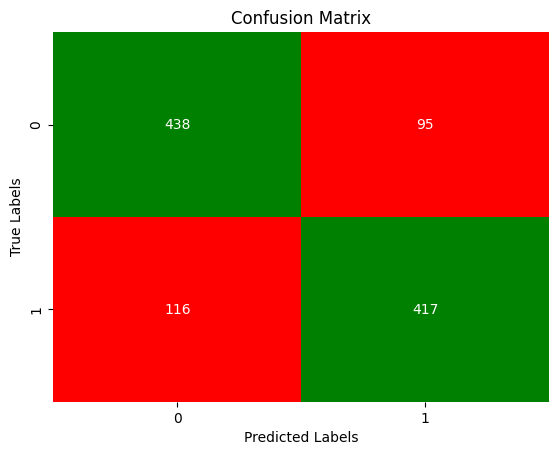

In [ ]:
cmap = sns.color_palette(['red', 'red', 'red', 'green'])

# Plot the confusion matrix with color coding

sns.heatmap(confusion_mat, annot=True, fmt="d", xticklabels=labels, yticklabels=labels,
            cmap=cmap, center=0,
            cbar_kws={'ticks': [-1, 0, 1]}, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

LSTM approach

Data preprocessing

In [4]:
import nltk
from string import punctuation
nltk.download('punkt')
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
#removing stopwords and punctation, transform to lower case
def getfilteredText(text):
  text = ''.join([c for c in text if c not in punctuation])
  tokens = word_tokenize(text)
  filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
  return filtered_tokens

In [6]:
#create a lookup table from words to integer

all_text2 = ' '
sentences=[]
#filter out the punctuation and stopwords using only train data, to prevent information leakage
for sample in rotten_tomatoes['train']:
  filtered_tokens = getfilteredText(sample['text'])
  sentences.append(filtered_tokens)
  text = ' '.join(filtered_tokens)
  all_text2 += text
  all_text2+= ' '
  #break
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)
total_words = len(words)
sorted_words = count_words.most_common(total_words)
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [89]:
from gensim.models import Word2Vec
# Train the Word2Vec model
word2vecmodel =  Word2Vec(sentences, min_count=1, window=2, vector_size=400)

In [93]:
word2vecmodel.wv.most_similar('movie')

[('film', 0.9978281855583191),
 ('one', 0.9969185590744019),
 ('like', 0.9962965846061707),
 ('story', 0.9962961077690125),
 ('characters', 0.9961779713630676),
 ('even', 0.9959062337875366),
 ('way', 0.9957190752029419),
 ('director', 0.9952009916305542),
 ('much', 0.9951761364936829),
 ('little', 0.9951556324958801)]

In [94]:
import gensim.downloader as api
from gensim.models import KeyedVectors
model_name = "fasttext-wiki-news-subwords-300"  # Specify the name of the model
word2vec_model = api.load(model_name)

[=================================================-] 99.8% 956.3/958.4MB downloaded


In [114]:
len(word2vec_model['movie'])

300

In [70]:
def convertTextword2vec_old(datasplit):
  vectorized_datasplit=[]
  for sample in datasplit:
    text = sample['text']
    vectorized_text = []
    filteredText = getfilteredText(text)
    for word in filteredText:
        if word in word2vecmodel.wv.key_to_index:  # Check if the word is present in the Word2Vec vocabulary
            vector = word2vecmodel.wv[word]  # Get the word vector
            vectorized_text.append(vector)
    vectorized_datasplit.append(vectorized_text)
  return vectorized_datasplit

In [112]:
def convertTextword2vec(datasplit):
  vectorized_datasplit=[]
  for sample in datasplit:
    text = sample['text']
    vectorized_text = []
    filteredText = getfilteredText(text)
    for word in filteredText:
        if word in word2vec_model.key_to_index:  # Check if the word is present in the Word2Vec vocabulary
          vector = word2vec_model[word]  # Get the word vector
          vectorized_text.append(vector)
    vectorized_datasplit.append(vectorized_text)
  return vectorized_datasplit

In [50]:
def pad_featuresword2vec(vectorized_datasplit, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    vec_dimension= len(vectorized_datasplit[0][0])
    features = np.zeros((len(vectorized_datasplit), seq_length,vec_dimension ), dtype = float)

    for i, review in enumerate(vectorized_datasplit):
        review_len = len(review)

        if review_len <= seq_length:
            zeroes = list(np.zeros((seq_length-review_len, vec_dimension), dtype = float))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]

        features[i,:] = np.array(new)

    return features

In [51]:
#convert one review to a list of integers with naive lookup table
def convertTextToFeatures(datasplit):
  reviews_int = []
  for review in datasplit:
    text = review['text']
    text = ''.join([c for c in text if c not in punctuation])
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    r = [vocab_to_int.get(w, 0) for w in filtered_tokens]
    reviews_int.append(r)
  return reviews_int

In [52]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)

    for i, review in enumerate(reviews_int):
        review_len = len(review)

        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]

        features[i,:] = np.array(new)

    return features

In [53]:
def tokenizeTextword2vec(datasplit):
  vectorized_datasplit = convertTextword2vec(datasplit)
  features = pad_featuresword2vec(vectorized_datasplit,20)
  return features

In [54]:
#naivly map each word to an interger and pad or truncate the resulting lists
def tokenizeText(datasplit):
  review_int = convertTextToFeatures(datasplit)
  features = pad_features(review_int, 20)
  return features

In [55]:
def tokenizeLabels(datasplit):
  encoded_labels = [item['label'] for item in datasplit]
  encoded_labels = np.array(encoded_labels)
  return encoded_labels

In [56]:
import torch
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
def createdataloaders(batch_size, word2vec=False ):
  if word2vec:
    tokenizeTextfunction = tokenizeTextword2vec
  else:
    tokenizeTextfunction = tokenizeText
  train_data = TensorDataset(torch.from_numpy(tokenizeTextfunction(rotten_tomatoes['train'])), torch.from_numpy(tokenizeLabels(rotten_tomatoes['train'])))
  valid_data = TensorDataset(torch.from_numpy(tokenizeTextfunction(rotten_tomatoes['validation'])), torch.from_numpy(tokenizeLabels(rotten_tomatoes['validation'])))
  test_data = TensorDataset(torch.from_numpy(tokenizeTextfunction(rotten_tomatoes['test'])), torch.from_numpy(tokenizeLabels(rotten_tomatoes['test'])))
  # make sure to SHUFFLE your data
  train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
  valid_loader = DataLoader(valid_data, shuffle=False, batch_size=batch_size)
  test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)
  return train_loader,valid_loader, test_loader

In [85]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers,word2vec, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.word2vec = word2vec
        # embedding and LSTM layers
        if not word2vec:
          self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            dropout=drop_prob, batch_first=True)

        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()


    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)
        # embeddings and lstm_out
        if self.word2vec:
          embeds = x#x.type(torch.float)
        else:
          embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden) #shape batch,sequence length,hidden_dim
        # using only last lstm output
        lstm_out = lstm_out.permute(0,2,1) # shape batch, hidden dim, sequence length
        lstm_out = lstm_out[:,:,-1].squeeze() # keep only last output

        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first

        # return last sigmoid output and hidden state
        return sig_out, hidden


    def init_hidden(self, batch_size, train_on_gpu):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

        return hidden

In [83]:
def train(epochs,train_loader, valid_loader, batch_size,word2vec=False, lr=0.001, embedding_dim=400):
  # Instantiate the model w/ hyperparams
  vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
  output_size = 1
  hidden_dim = 256
  n_layers = 2
  net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, word2vec)

  train_on_gpu = True if torch.cuda.is_available() else False

  print(f"Training on gpu: {train_on_gpu}")

  criterion = nn.BCELoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=lr)


  # training params

  counter = 0
  print_every = 50
  clip=5 # gradient clipping

  # move model to GPU, if available
  if(train_on_gpu):
      net.cuda()

  net.train()
  # train for some number of epochs
  for e in range(epochs):
      # initialize hidden state
      h = net.init_hidden(batch_size, train_on_gpu)

      # batch loop
      for inputs, labels in train_loader:
          counter += 1



          # Creating new variables for the hidden state, otherwise
          # we'd backprop through the entire training history
          h = tuple([each.data for each in h])

          # zero accumulated gradients
          net.zero_grad()

          # get the output from the model
          if word2vec:
            inputs = inputs.type(torch.float32)
          else:
            inputs = inputs.type(torch.LongTensor)
          if(train_on_gpu):
              inputs, labels= inputs.cuda(), labels.cuda()
          if inputs.shape[0] != batch_size:
            break
          output, h = net(inputs, h)

          # calculate the loss and perform backprop
          loss = criterion(output.squeeze(), labels.float())
          loss.backward()
          # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
          nn.utils.clip_grad_norm_(net.parameters(), clip)
          optimizer.step()

          # loss stats
      # Get validation loss
      val_h = net.init_hidden(batch_size, train_on_gpu)
      val_losses = []
      net.eval()
      correct =0
      total_length= 0
      for inputs, labels in valid_loader:
          # Creating new variables for the hidden state, otherwise
          # we'd backprop through the entire training history
          val_h = tuple([each.data for each in val_h])

          if word2vec:
            inputs = inputs.type(torch.float32)
          else:
            inputs = inputs.type(torch.LongTensor)
          # check the batch size
          if inputs.shape[0] != batch_size:
            break
          if(train_on_gpu):
              inputs, labels = inputs.cuda(), labels.cuda()
          # last
          output, val_h = net(inputs, val_h)
          val_loss = criterion(output.squeeze(), labels.float())
          predicted_labels = torch.where(output.squeeze() > 0.5, torch.tensor(1), torch.tensor(0))
          correct  += ( predicted_labels== labels).sum().item()
          total_length += inputs.shape[0]
          val_losses.append(val_loss.item())
      net.train()
      print("Epoch: {}/{}...".format(e+1, epochs),
            "Step: {}...".format(counter),
            "Loss: {:.6f}...".format(loss.item()),
            "Val Loss: {:.6f}".format(np.mean(val_losses)),
            "Accurancy: {:.6f}".format(correct/total_length))
  return net

In [79]:
#training the LSTM with naive integer wird embedding
#hyperparameters
batchsize = 128
lr = 0.001
epochs = 4
train_loader, val_loader, test_loader=createdataloaders(batchsize)
net = train(epochs, train_loader, val_loader, batch_size=batchsize,lr=lr)

Training on gpu: True
Epoch: 1/4... Step: 67... Loss: 0.625340... Val Loss: 0.631652 Accurancy: 0.649414
Epoch: 2/4... Step: 134... Loss: 0.389905... Val Loss: 0.623553 Accurancy: 0.678711
Epoch: 3/4... Step: 201... Loss: 0.416242... Val Loss: 0.674705 Accurancy: 0.692383
Epoch: 4/4... Step: 268... Loss: 0.139437... Val Loss: 0.765790 Accurancy: 0.699219


word2vec funktioniert nur mit einer vorterainer liabra.

ein beispiel zeigen von movie-> es lernt keine guten Features alles zu ähnlich

In [117]:
#training the LSTM with word2vec embedding
#hyperparameters
batchsize = 128
lr = 0.001
epochs = 7
#train_loader, val_loader, test_loader=createdataloaders(batchsize, word2vec=True)
net = train(epochs, train_loader, val_loader, batch_size=batchsize,lr=lr, word2vec=True, embedding_dim=300)

Training on gpu: True
Epoch: 1/7... Step: 67... Loss: 0.655223... Val Loss: 0.635515 Accurancy: 0.600586
Epoch: 2/7... Step: 134... Loss: 0.501230... Val Loss: 0.496386 Accurancy: 0.771484
Epoch: 3/7... Step: 201... Loss: 0.537708... Val Loss: 0.482586 Accurancy: 0.765625
Epoch: 4/7... Step: 268... Loss: 0.455723... Val Loss: 0.469351 Accurancy: 0.772461
Epoch: 5/7... Step: 335... Loss: 0.442239... Val Loss: 0.450385 Accurancy: 0.781250
Epoch: 6/7... Step: 402... Loss: 0.539637... Val Loss: 0.481948 Accurancy: 0.753906
Epoch: 7/7... Step: 469... Loss: 0.364379... Val Loss: 0.458540 Accurancy: 0.771484


In [118]:
net

SentimentLSTM(
  (lstm): LSTM(300, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [153]:
pred, labels = get_predictions(net,test_loader)

In [161]:
(pred == labels).int().sum()/len(pred)

tensor(0.7692)

In [152]:
def get_predictions(net, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = net.to(device)
    net.eval()

    predictions = []
    labels = []
    with torch.no_grad():
        for inputs,y in test_loader:
            inputs = inputs.float().to(device)
            hidden = net.init_hidden(inputs.size(0), torch.cuda.is_available())
            outputs, hidden = net(inputs, hidden)
            predicted_labels = (outputs > 0.5).int()  # Convert probabilities to binary predictions

            predictions.append(predicted_labels.cpu())
            labels.append(y)
    predictions = torch.cat(predictions, dim=0)
    labels = torch.cat(labels, dim=0)
    return predictions.squeeze(), labels.squeeze()


In [78]:
for x,y in train_loader:
  print(x[13])
  break

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0116, -0.0285,  0.0647,  ..., -0.0467,  0.0349,  0.0214],
        [-0.0012,  0.0006,  0.0023,  ...,  0.0020, -0.0011,  0.0024],
        [ 0.0011, -0.0026,  0.0056,  ..., -0.0030,  0.0019,  0.0011]],
       dtype=torch.float64)


In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(18095, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
import torch.nn.utils.rnn as rnn_utils
# loss and optimization functions

net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
lr=0.00005

train_on_gpu = True if torch.cuda.is_available() else False

print(f"Training on gpu: {train_on_gpu}")

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 20 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 50
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size, train_on_gpu)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1



        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        if(train_on_gpu):
            inputs, labels= inputs.cuda(), labels.cuda()
        if inputs.shape[0] != batch_size:
          break
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
    # Get validation loss
    val_h = net.init_hidden(batch_size, train_on_gpu)
    val_losses = []
    net.eval()
    correct =0
    total_length= 0
    for inputs, labels in valid_loader:
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        val_h = tuple([each.data for each in val_h])

        inputs = inputs.type(torch.LongTensor)
        # check the batch size
        if inputs.shape[0] != batch_size:
          break
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()
        # last
        output, val_h = net(inputs, val_h)
        val_loss = criterion(output.squeeze(), labels.float())
        predicted_labels = torch.where(output.squeeze() > 0.5, torch.tensor(1), torch.tensor(0))
        correct  += ( predicted_labels== labels).sum().item()
        total_length += inputs.shape[0]
        val_losses.append(val_loss.item())
    net.train()
    print("Epoch: {}/{}...".format(e+1, epochs),
          "Step: {}...".format(counter),
          "Loss: {:.6f}...".format(loss.item()),
          "Val Loss: {:.6f}".format(np.mean(val_losses)),
          "Accurancy: {:.6f}".format(correct/total_length))

Training on gpu: True
Epoch: 1/20... Step: 67... Loss: 0.692485... Val Loss: 0.691433 Accurancy: 0.517578
Epoch: 2/20... Step: 134... Loss: 0.688339... Val Loss: 0.689718 Accurancy: 0.553711
Epoch: 3/20... Step: 201... Loss: 0.686350... Val Loss: 0.686605 Accurancy: 0.577148
Epoch: 4/20... Step: 268... Loss: 0.672655... Val Loss: 0.678294 Accurancy: 0.617188
Epoch: 5/20... Step: 335... Loss: 0.667528... Val Loss: 0.680363 Accurancy: 0.558594


KeyboardInterrupt: ignored

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

AttributeError: ignored

In [ ]:
reviews_int = []
for review in rotten_tomatoes['train']:
    text = review['text']
    text = ''.join([c for c in text if c not in punctuation])
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    r = [vocab_to_int[w] for w in filtered_tokens]
    reviews_int.append(r)

[[545, 2555, 3016, 8797, 33, 5980, 201, 133, 15, 3017, 6, 2207, 1292, 1748, 8798, 1293, 5981, 775, 8799], [3018, 2556, 5982, 3622, 2208, 3623, 949, 5983, 776, 3624, 3019, 5984, 1023, 4548, 3625, 604, 1183, 3020, 3020, 5985, 8800], [572, 8801, 1749]]


In [ ]:
rotten_tomatoes['train'][0]['label']

1

In [ ]:
import numpy as np
# encode the labels
encoded_labels = [item['label'] for item in rotten_tomatoes['train']]
encoded_labels = np.array(encoded_labels)


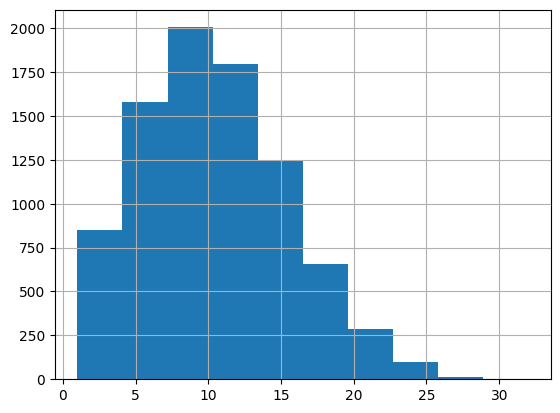

count    8530.000000
mean       10.636460
std         4.856985
min         1.000000
25%         7.000000
50%        10.000000
75%        14.000000
max        32.000000
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [ ]:
features = pad_features(reviews_int, 20)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
def tokenize(subdataset):


smv

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [ ]:
classifier = SVC()
classifier.fit(train_features, rotten_tomatoes['train']['label'])
predictions = classifier.predict(test_features)
accuracy = accuracy_score(rotten_tomatoes['test']['label'], predictions)
precision = precision_score(rotten_tomatoes['test']['label'], predictions)
recall = recall_score(rotten_tomatoes['test']['label'], predictions)
f1 = f1_score(rotten_tomatoes['test']['label'], predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

confusion_mat = confusion_matrix(rotten_tomatoes['test']['label'], predictions)

Accuracy: 0.7485928705440901
Precision: 0.744916820702403
Recall: 0.7560975609756098
F1-score: 0.7504655493482308


In [ ]:
classifier = SVC()
pca = PCA(n_components=100)  # Specify the number of components you want to keep
train_features_pca = pca.fit_transform(train_features.toarray())
test_features_pca = pca.transform(test_features.toarray())
classifier.fit(train_features_pca, rotten_tomatoes['train']['label'])
predictions = classifier.predict(test_features_pca)
accuracy = accuracy_score(rotten_tomatoes['test']['label'], predictions)
precision = precision_score(rotten_tomatoes['test']['label'], predictions)
recall = recall_score(rotten_tomatoes['test']['label'], predictions)
f1 = f1_score(rotten_tomatoes['test']['label'], predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

confusion_mat = confusion_matrix(rotten_tomatoes['test']['label'], predictions)

Accuracy: 0.648217636022514
Precision: 0.6385964912280702
Recall: 0.6829268292682927
F1-score: 0.6600181323662738


In [ ]:
model='bert-base-uncased'

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model)

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)
tokenized_rotten_tomatoes = rotten_tomatoes.map(preprocess_function, batched=True)

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    model, num_labels=2, id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
training_args = TrainingArguments(
    output_dir=".",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_rotten_tomatoes["train"],
    eval_dataset=tokenized_rotten_tomatoes["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.379404,0.852720
2,No log,0.429541,0.866792
3,No log,0.603115,0.852720
4,0.109600,0.591824,0.862101


TrainOutput(global_step=536, training_loss=0.10467616279623401, metrics={'train_runtime': 357.0525, 'train_samples_per_second': 95.56, 'train_steps_per_second': 1.501, 'total_flos': 981505986471240.0, 'train_loss': 0.10467616279623401, 'epoch': 4.0})

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
rotten_tomatoes['test'][0]

{'text': 'lovingly photographed in the manner of a golden book sprung to life , stuart little 2 manages sweetness largely without stickiness .',
 'label': 1}

In [ ]:
#TODO load to cuda
correct_predictions = 0
device = 'cuda'
model.to('cpu')
for example in rotten_tomatoes['test']:
  input_text = example['text']
  true_label = example['label']
  predicted_label = classifier(input_text)[0]['label']
  print(predicted_label)
  print(true_label)
  if label2id[predicted_label] == true_label:
    correct_predictions += 1
  if correct_predictions==10:
    break

POSITIVE
1
POSITIVE
1
NEGATIVE
1
POSITIVE
1
POSITIVE
1
POSITIVE
1
POSITIVE
1
NEGATIVE
1
POSITIVE
1
POSITIVE
1
POSITIVE
1
POSITIVE
1


In [ ]:
model2 = classifier = pipeline("sentiment-analysis", model='/content/checkpoint-1068', tokenizer=tokenizer)